In [ ]:
import requests
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



In [27]:

# pretty print is used to print the output in the console in an easy to read format
from pprint import pprint


# function to use requests.post to make an API call to the subgraph url
def run_query(q):

    # endpoint where you are making the request
    request = requests.post('https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2'
                            '',
                            json={'query': query})
    if request.status_code == 200:
        return request.json()
    else:
        raise Exception('Query failed. return code is {}.      {}'.format(request.status_code, query))


# The Graph query - Query Uniswap for a list of the top 10 pairs where the reserve is > 1000000 USD and the volume is >50000 USD
query = """
{
 pair(
       id: "0x000bc4f31d2c8dcc66f6f1c93bb00920e3ea6c5d"){
       id
			 token0 {
       id
       symbol
       name
       derivedETH
      totalLiquidity
     }
     token1 {
       id
       symbol
       name
       derivedETH
      totalLiquidity
     }
     reserve0
     reserve1
     reserveUSD
     trackedReserveETH
     token0Price
     token1Price
     volumeUSD
     createdAtTimestamp
     
 }
}
"""
result = run_query(query)

# print the results
#print('Print Result - {}'.format(result))
#print('#############')
# pretty print the results
pprint(result)

{'data': {'pair': {'createdAtTimestamp': '1601920889',
                   'id': '0x000bc4f31d2c8dcc66f6f1c93bb00920e3ea6c5d',
                   'reserve0': '0.000000000000045688',
                   'reserve1': '0.000000000000000022',
                   'reserveUSD': '0.00000000000001545120068685391156727101592459504',
                   'token0': {'derivedETH': '0.0004815268779548240238136928734022063',
                              'id': '0xb8d9059ce0bfaa6d9e823383067a526434b2059b',
                              'name': 'UniStake',
                              'symbol': 'UNISTAKE',
                              'totalLiquidity': '0.000000000000045688'},
                   'token0Price': '2076.727272727272727272727272727273',
                   'token1': {'derivedETH': '1',
                              'id': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2',
                              'name': 'Wrapped Ether',
                              'symbol': 'WETH',
                           

In [31]:
df = pd.read_excel('/content/jsontocsv.xlsx')


In [32]:
df


,createdAtTimestamp,id,reserve0,reserve1,reserveUSD,token0/derivedETH,token0/id,token0/name,token0/symbol,token0/totalLiquidity,token0Price,token1/derivedETH,token1/id,token1/name,token1/symbol,token1/totalLiquidity,token1Price,trackedReserveETH,volumeUSD
0,1601920889,0x000bc4f31d2c8dcc66f6f1c93bb00920e3ea6c5d,4.568800e-14,2.200000e-17,1.545120e-14,0.000482,0xb8d9059ce0bfaa6d9e823383067a526434b2059b,UniStake,UNISTAKE,4.568800e-14,2076.727273,1,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,WETH,729558.169512,0.000482,4.400000e-17,3894.964771


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   createdAtTimestamp     1 non-null      int64  
 1   id                     1 non-null      object 
 2   reserve0               1 non-null      float64
 3   reserve1               1 non-null      float64
 4   reserveUSD             1 non-null      float64
 5   token0/derivedETH      1 non-null      float64
 6   token0/id              1 non-null      object 
 7   token0/name            1 non-null      object 
 8   token0/symbol          1 non-null      object 
 9   token0/totalLiquidity  1 non-null      float64
 10  token0Price            1 non-null      float64
 11  token1/derivedETH      1 non-null      int64  
 12  token1/id              1 non-null      object 
 13  token1/name            1 non-null      object 
 14  token1/symbol          1 non-null      object 
 15  token1/tot

**Since there was only 1 pair for UNI/WETH in Uniswap v2 so I could get only 1 row for the dataframe.**

In [34]:
def getFeatures(df):
    num_features = df.select_dtypes(include=[np.number])
    cat_features = df.select_dtypes(include=[np.object])
    return num_features,cat_features

In [36]:
num_features,cat_features = getFeatures(df)

In [37]:
num_features

,createdAtTimestamp,reserve0,reserve1,reserveUSD,token0/derivedETH,token0/totalLiquidity,token0Price,token1/derivedETH,token1/totalLiquidity,token1Price,trackedReserveETH,volumeUSD
0,1601920889,4.568800e-14,2.200000e-17,1.545120e-14,0.000482,4.568800e-14,2076.727273,1,729558.169512,0.000482,4.400000e-17,3894.964771


In [38]:
cat_features

,id,token0/id,token0/name,token0/symbol,token1/id,token1/name,token1/symbol
0,0x000bc4f31d2c8dcc66f6f1c93bb00920e3ea6c5d,0xb8d9059ce0bfaa6d9e823383067a526434b2059b,UniStake,UNISTAKE,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,WETH


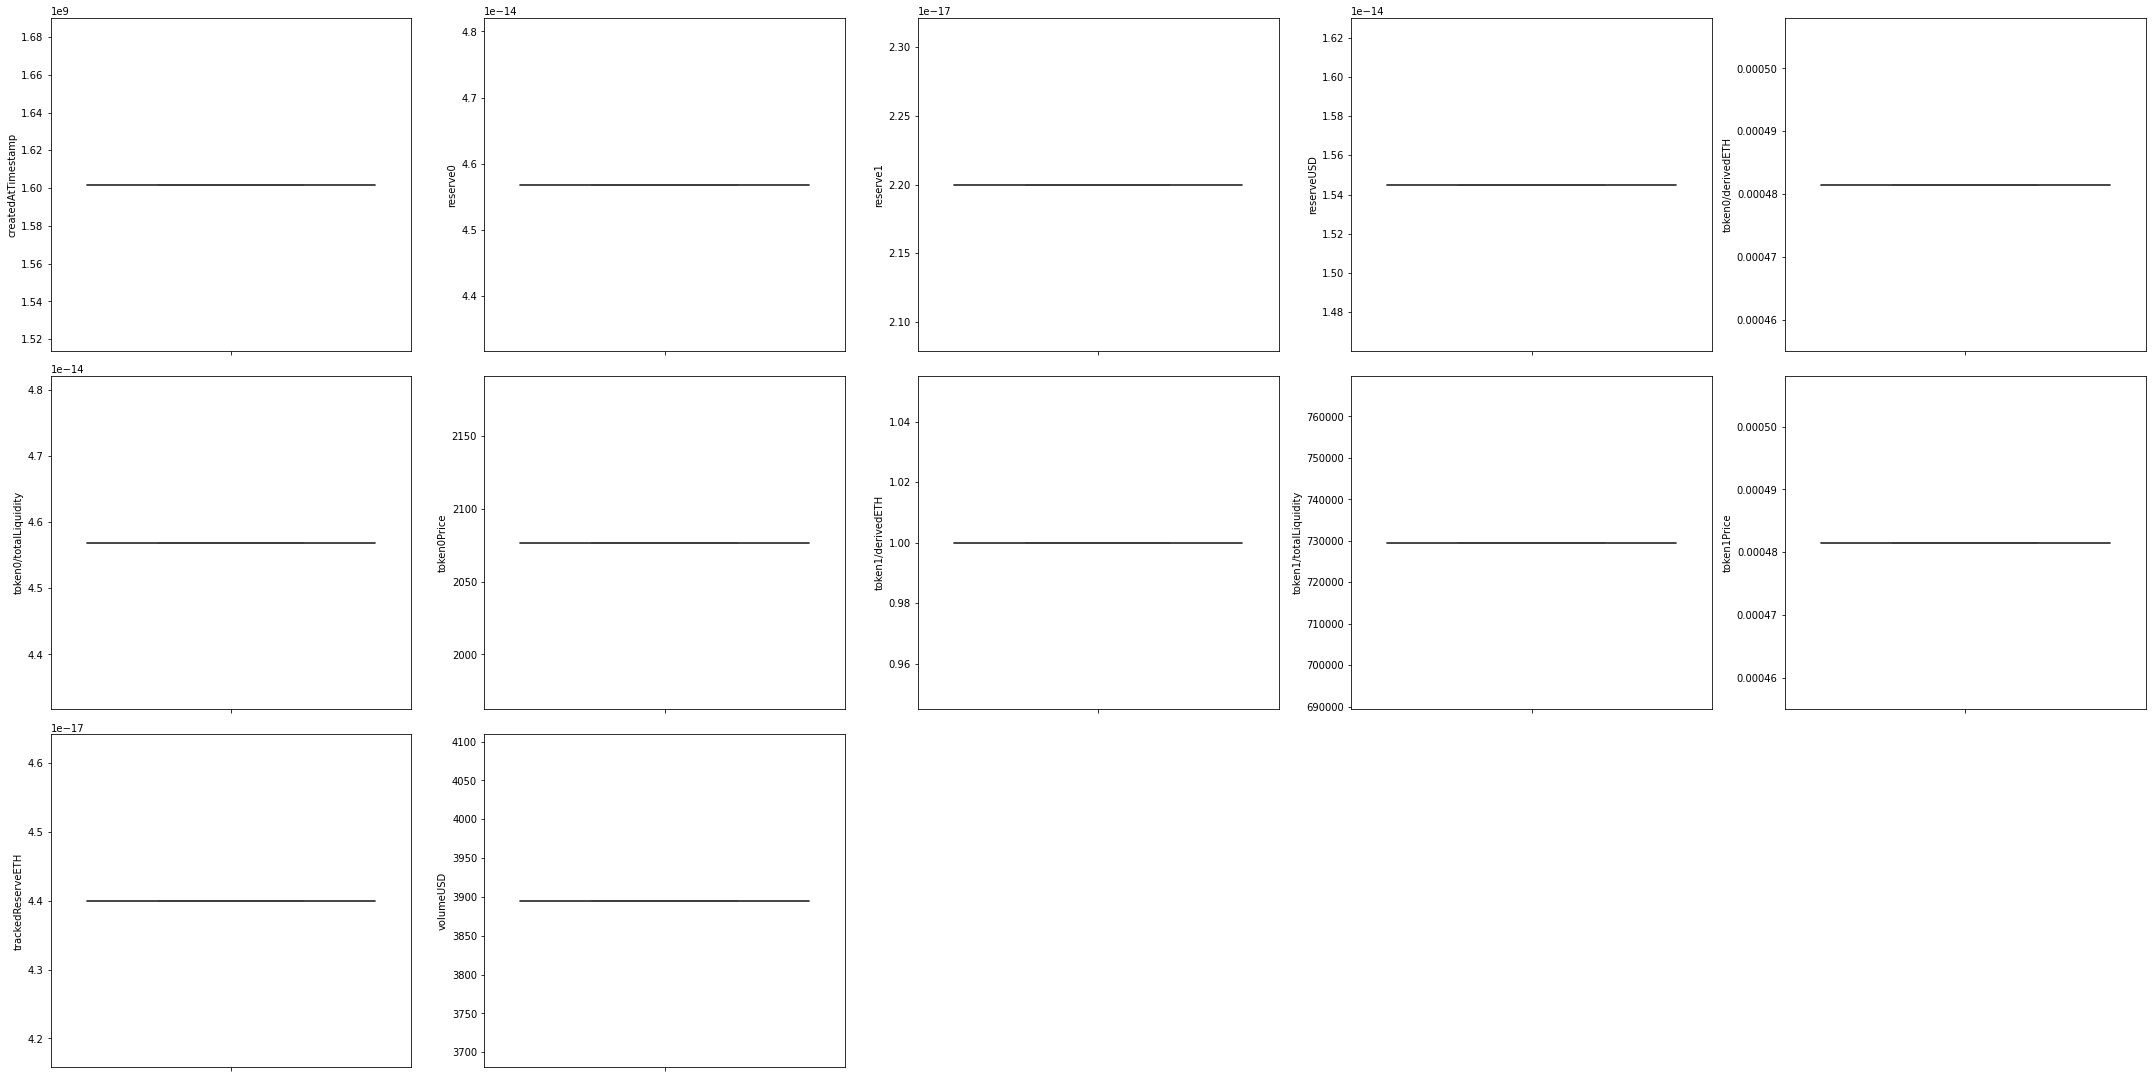

In [40]:
## Box plot of numerical features

fig = plt.figure(figsize=(30,20))
for i in range(len(num_features.columns)):
    fig.add_subplot(4,5,i+1)
    sns.boxplot(y = num_features.iloc[:,i])
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate

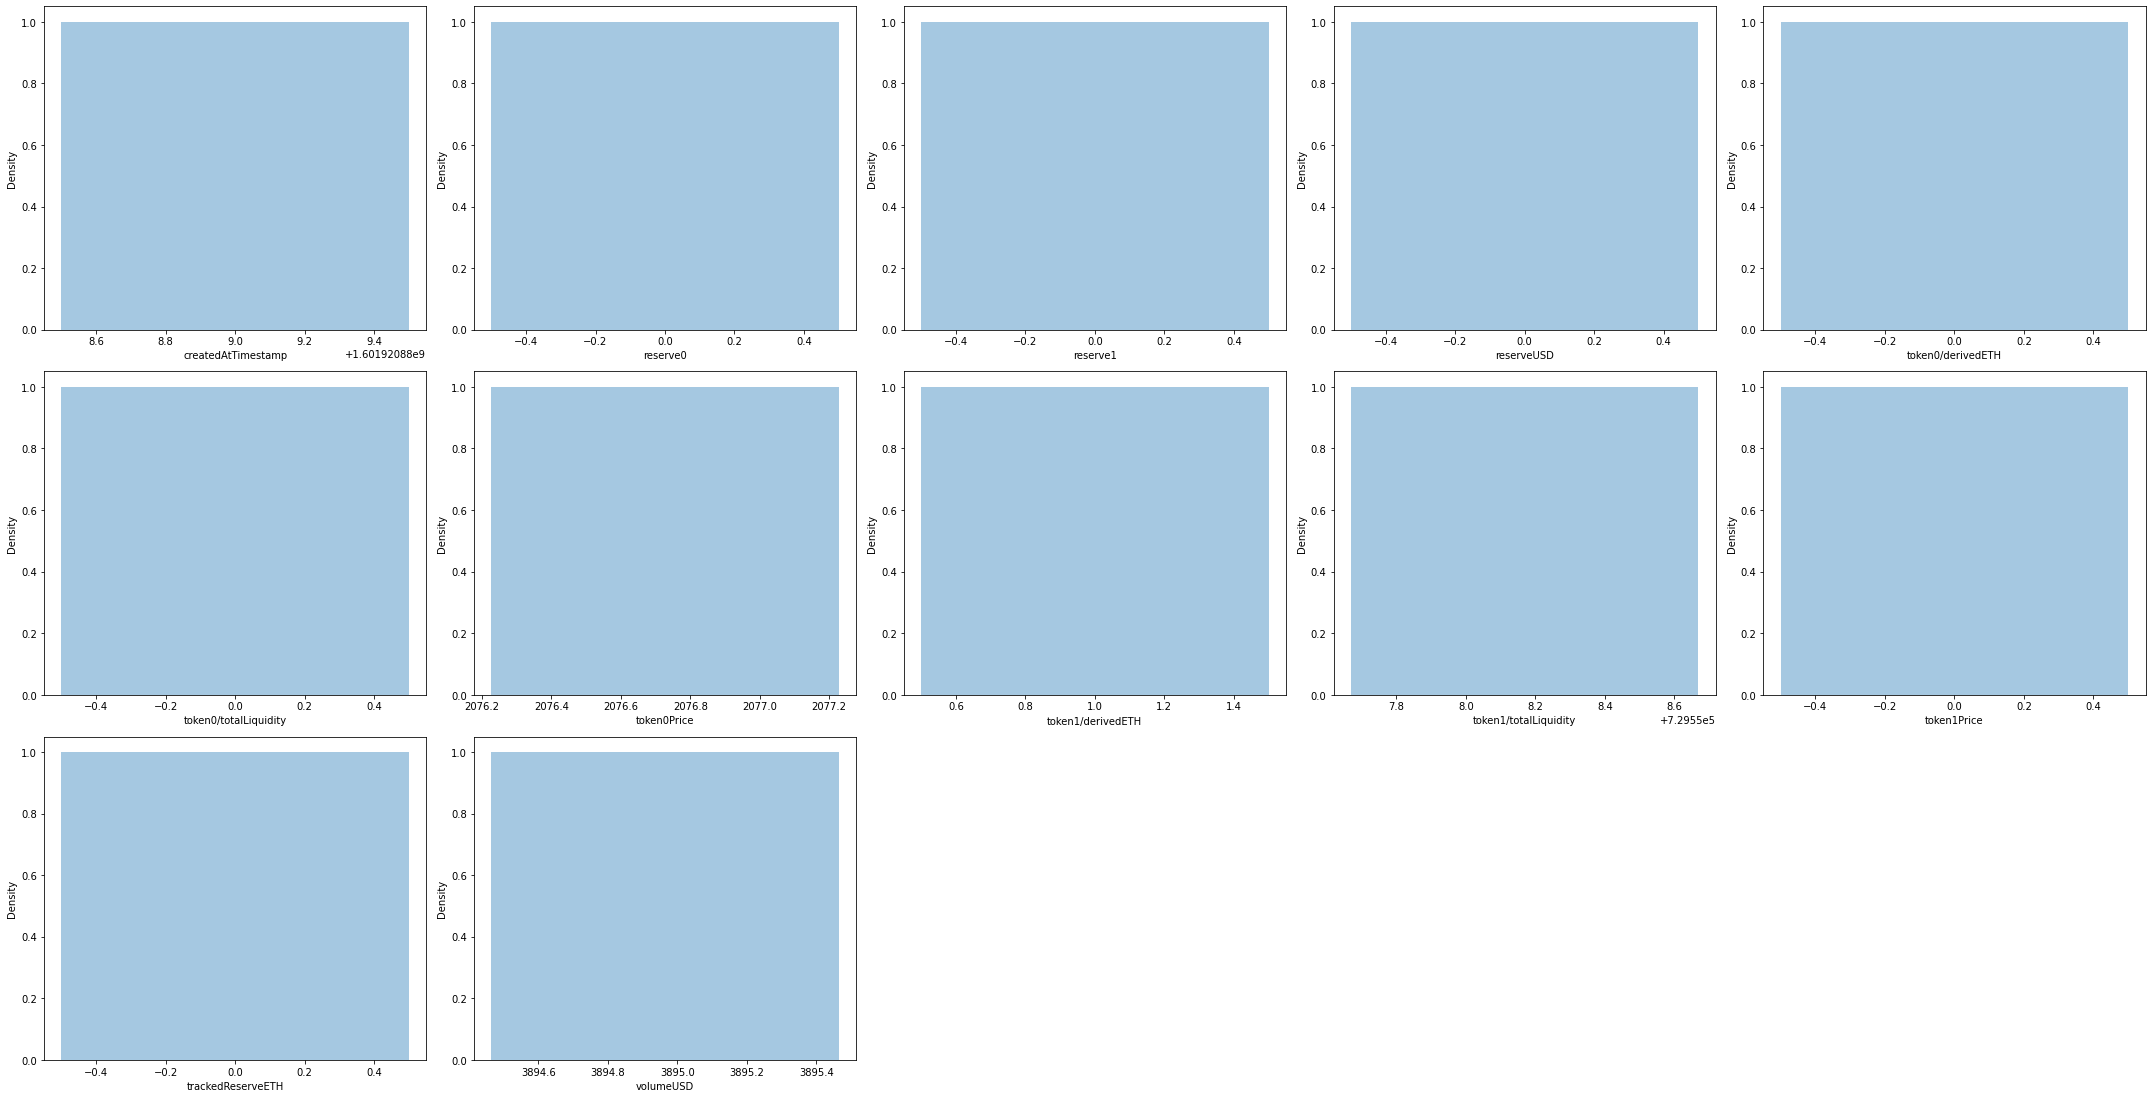

In [41]:
## Dist plot of numerical features
fig = plt.figure(figsize=(30,20))
for i in range(len(num_features.columns)):
    fig.add_subplot(4,5,i+1)
    sns.distplot( num_features.iloc[:,i])
plt.tight_layout()
plt.show()